In [5]:
import matplotlib.pyplot as plt
import numpy
import scipy.integrate
import sympy

Gibbs jump:

$$ \dfrac{1}{2} + \dfrac{ \displaystyle\int\limits_{0}^{\pi} \dfrac{sin(t)}{t}\ dt }{\pi} \approx 1.08949 $$

In [6]:
x = numpy.linspace(0.00001, numpy.pi, 10000)
y = numpy.sin(x) / x
integral = scipy.integrate.simps(y, x)
gibbsJump = 1/2 + integral/numpy.pi
print('Gibbs jump = {:.10f}'.format(gibbsJump))

Gibbs jump = 1.0894866891


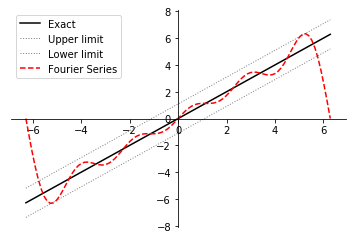

In [13]:
pi = sympy.pi
x = sympy.symbols('x')
limits = (-2*pi, 2*pi)
truncateSeriesAt = 5

f = x
Ff = sympy.fourier_series(f, limits=(x, *limits))
lambdaf = sympy.lambdify(x, f, modules=numpy)
lambdaFf = sympy.lambdify(x, Ff.truncate(truncateSeriesAt), modules=numpy)

X = numpy.linspace(float(limits[0]), float(limits[1]), 100)
yf = lambdaf(X)
yF = lambdaFf(X)
plt.plot(X, yf, 'k', label='Exact')
plt.plot(X, yf+gibbsJump, color='gray', linestyle=':', linewidth=1, label='Upper limit')
plt.plot(X, yf-gibbsJump, color='gray', linestyle=':', linewidth=1, label='Lower limit')
plt.plot(X, yF, 'r--', label='Fourier Series')

plt.legend(loc='best')
ax = plt.gca()
ax.spines["right"].set_color("none")
ax.spines["top"].set_color("none")
ax.spines["left"].set_position(("data",0))
ax.spines["bottom"].set_position(("data",0))

plt.show()